In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('/workspaces/MBTI-Personality-Test/Data/mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


(array([1470.,  685., 1304., 1091.,  231.,  190., 1832.,  675.,  271.,
         337.,  166.,  205.,   89.,   48.,   39.,   42.]),
 array([ 0.    ,  0.9375,  1.875 ,  2.8125,  3.75  ,  4.6875,  5.625 ,
         6.5625,  7.5   ,  8.4375,  9.375 , 10.3125, 11.25  , 12.1875,
        13.125 , 14.0625, 15.    ]),
 <BarContainer object of 16 artists>)

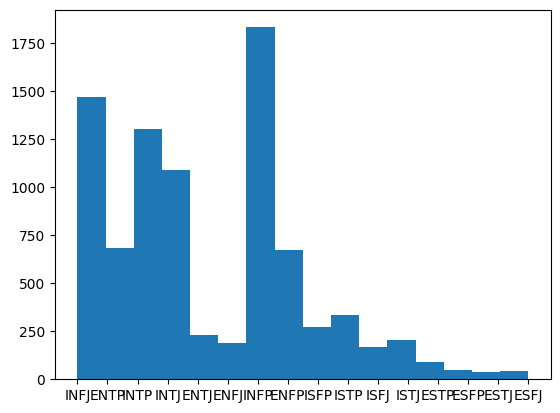

In [52]:
plt.hist(df['type'], bins=16)

In [53]:
# remove urls in the text
def remove_url(dataframe, col):
    return dataframe[col].str.replace(r'(http|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])', "", regex=True).astype(str)

# replace ||| with [SEP] so that bert can recognize the end of a sentence
def replace_sep(dataframe):
    return dataframe.str.replace(r'|||', r"[SEP]", regex=False).str.replace(r'''(^['"]*|['"]*$)''', "", regex=True)

# split the line according to [SEP]
def split_line(dataframe):
    return dataframe.str.split(r'\[SEP\]', expand=True).stack().reset_index(level=1, drop=True).rename('posts')

# strip the spaces
def remove_empty(dataframe):
    return dataframe.str.replace(r'\s+', ' ', regex=True).str.strip().str.strip("\"").dropna()

# remove the rows length smaller than 2
def remove_empty_row(dataframe):
    return dataframe[dataframe.str.len() > 2]

df_tmp = (df.pipe(remove_url, 'posts').pipe(replace_sep).pipe(split_line).pipe(remove_empty).pipe(remove_empty_row))





In [54]:
df_new = df.drop(['posts'], axis=1).join(df_tmp).reset_index().drop(['index'], axis=1)
df_new.head()

,type,posts
0,INFJ,enfp and intj moments sportscenter not top ten...
1,INFJ,What has been the most life-changing experienc...
2,INFJ,On repeat for most of today.
3,INFJ,May the PerC Experience immerse you.
4,INFJ,The last thing my INFJ friend posted on his fa...


(array([4.2860e+03, 2.7900e+03, 2.0550e+03, 3.5480e+03, 2.4030e+03,
        3.9080e+03, 4.2160e+03, 2.7300e+03, 4.1820e+03, 2.7540e+03,
        4.1540e+03, 4.2180e+03, 2.7630e+03, 4.1380e+03, 2.7290e+03,
        3.9710e+03, 3.8520e+03, 2.5810e+03, 3.7530e+03, 2.5140e+03,
        3.6280e+03, 3.6880e+03, 2.3280e+03, 3.6150e+03, 2.2610e+03,
        3.4260e+03, 3.5120e+03, 2.2000e+03, 3.1870e+03, 2.1860e+03,
        3.1500e+03, 3.1730e+03, 2.0890e+03, 3.0000e+03, 2.0460e+03,
        3.0170e+03, 2.9360e+03, 1.9960e+03, 2.8950e+03, 1.8530e+03,
        2.8700e+03, 2.7590e+03, 1.7760e+03, 2.6930e+03, 1.8030e+03,
        2.6240e+03, 2.5440e+03, 1.6390e+03, 2.4300e+03, 1.6480e+03,
        2.4130e+03, 2.3880e+03, 1.5790e+03, 2.3580e+03, 1.5370e+03,
        2.3650e+03, 2.3260e+03, 1.5540e+03, 2.1500e+03, 1.3620e+03,
        2.0610e+03, 2.0520e+03, 1.3770e+03, 2.0620e+03, 1.3230e+03,
        1.9570e+03, 1.9940e+03, 1.4490e+03, 2.4550e+03, 2.1320e+03,
        5.3740e+03, 1.1182e+04, 1.4537e+04, 3.96

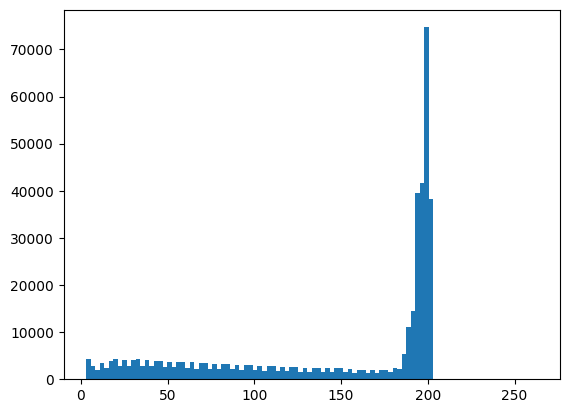

In [55]:
length = df_new['posts'].str.len()
plt.hist(length, bins=100)

In [56]:
min(length)

3

In [57]:
type2num = {'ISTJ': 0, 'ISFJ': 1, 'INFJ': 2, 'INTJ': 3, 'ISTP': 4, 'ISFP': 5, 'INFP': 6, 'INTP': 7, 'ESTP': 8, 'ESFP': 9, 'ENFP': 10, 'ENTP': 11, 'ESTJ': 12, 'ESFJ': 13, 'ENFJ': 14, 'ENTJ': 15}
num2type = {0: 'ISTJ', 1: 'ISFJ', 2: 'INFJ', 3: 'INTJ', 4: 'ISTP', 5: 'ISFP', 6: 'INFP', 7: 'INTP', 8: 'ESTP', 9: 'ESFP', 10: 'ENFP', 11: 'ENTP', 12: 'ESTJ', 13: 'ESFJ', 14: 'ENFJ', 15: 'ENTJ'}

In [58]:
df_new['type'] = df_new['type'].map(type2num)
df_new.columns = ['label', 'text']
df_new.head()

,label,text
0,2,enfp and intj moments sportscenter not top ten...
1,2,What has been the most life-changing experienc...
2,2,On repeat for most of today.
3,2,May the PerC Experience immerse you.
4,2,The last thing my INFJ friend posted on his fa...


In [60]:
shuffle = np.random.permutation(len(df_new))
df_new = df_new.iloc[shuffle]
df_test = df_new.iloc[:int(0.2*len(df_new))]
df_train = df_new.iloc[int(0.2*len(df_new)):]

In [61]:
df_train.shape

(328660, 2)

In [62]:
df_test.to_csv('/workspaces/MBTI-Personality-Test/Data/mbti_test.csv', index=False)

In [63]:
df_new.to_csv('/workspaces/MBTI-Personality-Test/Data/mbti_cleaned.csv', index=False)

In [46]:
df_train.to_csv('/workspaces/MBTI-Personality-Test/Data/mbti_train.csv', index=False)

In [47]:
with open('/workspaces/MBTI-Personality-Test/Data/label_to_num', 'w', encoding='utf-8') as f:
    json.dump(type2num, f)

with open('/workspaces/MBTI-Personality-Test/Data/num_to_label', 'w', encoding='utf-8') as f:
    json.dump(num2type, f)

(array([ 7699.,  6247., 56219., 40839., 12658.,  9949., 69350., 49139.,
         3432.,  1684., 25693., 26603.,  1519.,  1620.,  7241.,  8768.]),
 array([ 0.    ,  0.9375,  1.875 ,  2.8125,  3.75  ,  4.6875,  5.625 ,
         6.5625,  7.5   ,  8.4375,  9.375 , 10.3125, 11.25  , 12.1875,
        13.125 , 14.0625, 15.    ]),
 <BarContainer object of 16 artists>)

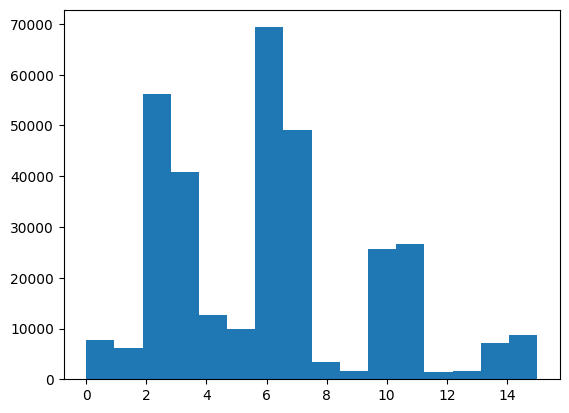

In [48]:
plt.hist(df_train['label'], bins=16)

In [49]:
print(df_new.shape)
print(df_train.shape)

(410824, 2)
(328660, 2)


In [25]:
avg = int(df_train.shape[0] / 16)
cnt = df_train.groupby('label').count()
print(cnt)
print(avg)

        text
label       
0       7697
1       6277
2      56169
3      40877
4      12682
5       9955
6      69759
7      49196
8       3397
9       1698
10     25786
11     26514
12      1501
13      1594
14      7253
15      8833
20574


In [50]:
aug = cnt.apply(lambda x: (avg - x)).clip(0)
aug

,text
label,
0,12877
1,14297
2,0
3,0
4,7892
5,10619
6,0
7,0
8,17177


In [26]:
aug = cnt.apply(lambda x: (avg - x)).clip(0)
aug

,text
label,
0,12877
1,14297
2,0
3,0
4,7892
5,10619
6,0
7,0
8,17177
